# Linear Regression

In a linear model, we assume that a value to be predicted $y$ is a linear combination of the input variables $ X \in R^p $ plus some noise $ \epsilon $. Mathematically, this can be expressed as:

$ y = \beta_0 + \beta_1 X + \epsilon $

where:
- $ y $ is the dependent variable (the value to be predicted),
- $ X $ is the vector of values representing the input variables,
- $ \beta_0 $ is the intercept,
- $ \beta_1 $ is the vector of coefficients for the input variables,
- $ \epsilon $ is the error term (noise).


We may assume that $ \beta_0 = 0 $ and $ E(\epsilon) = 0$, as we can simply extend $ X $ to $R^{p+1}$, by adding a column of ones that could correspond to the sum of the intercept and the error term expected value.

## Least Squares Estimator

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set seed
np.random.seed(0)

# number of samples
n = 100

# number of input variables
p = 1

# input data assumed to be normally distributed
# the first column is all ones (intercept + error expecation)
# we define the input data to have a mean of 0 and a standard deviation of 4
sigma = 4
X = np.concatenate((np.ones(n)[:, None], (sigma * np.random.randn(n, p))), axis=1)

# generate the error term
# we define the error term to have a mean of 0 and a standard deviation of 3
epsilon = 3*np.random.randn(n)

# define beta
beta = np.array([3.2, 2.1])

# generate the response variable
y = X.dot(beta) + epsilon

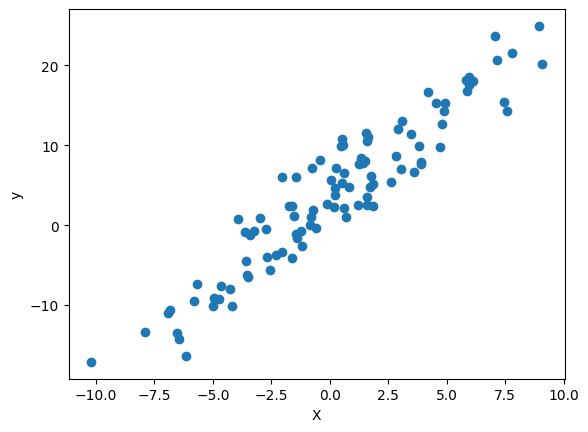

In [4]:
# axis labels
plt.xlabel('X')
plt.ylabel('y')

# plot down the data
plt.scatter(X[:, 1],y)
plt.show()

We can infer the least squares estimates of the coefficients $ \beta_0 $ and $ \beta_1 $ using the following formulas:
$ \beta^*= (X^TX)^{-1}X^Ty$

Estimated slope:  2.1860238251597863
Estimated intercept:  3.4254592551575436
True slope:  2.1
True intercept:  3.2


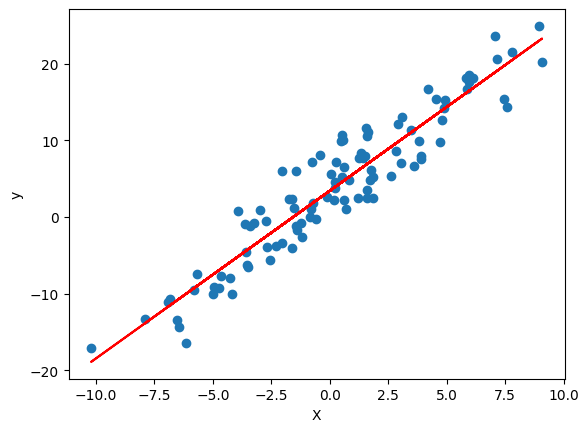

In [6]:
# infer the slope and intercept
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# print the estimated slope and intercept
print('Estimated slope: ', beta_hat[1])
print('Estimated intercept: ', beta_hat[0])

# print the true slope and intercept
print('True slope: ', beta[1])
print('True intercept: ', beta[0])

# plot down the data and the fitted line
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X[:, 1],y)
plt.plot(X[:, 1], X.dot(beta_hat), color='red')
plt.show()



## Fisher Test

We want to test the null hypothesis that the coefficient $ \beta_1 $ is equal to zero. We can use the Fisher test to do this. The test statistic is given by:

$ F = \frac{R^2\times(n-p-1)}{(1-R^2)p} $ 

with $ R^2 = \frac{\Sigma_i(\beta^*.X_i - \bar{y})^2}{\Sigma_i(\beta^*.X_i - y_i)^2} $



In [7]:
from scipy.stats import f


# compute the residuals
R_2 = ((y.mean() - X.dot(beta_hat))**2).sum() / ((y - y.mean())**2).sum()

# compute the F-statistic
F = R_2 * (n - p - 1) / ((1 - R_2) * p)

# print the results
print(f"The rejection threshold is: {f.ppf(0.95, p, n - p - 1)}")
print(f"The F-statistic is: {F}")
print(f"The p-value is: {1 - f.cdf(F, p, n - p - 1)}")


The rejection threshold is: 3.938111078003373
The F-statistic is: 799.9951016493648
The p-value is: 1.1102230246251565e-16


We build a setting where the null hypothesis is true. We generate a dataset with a linear relationship between the input variable and the output variable, and we test if the Fisher test can reject the null hypothesis.

In [25]:
# y does not depend on the second column of X
y_test_2 = epsilon

# infer the slope and intercept
beta_hat_2 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_test_2)

# compute the residuals
R_2_2 = ((y_test_2.mean() - X.dot(beta_hat_2))**2).sum() / ((y_test_2 - y_test_2.mean())**2).sum()

# compute the F-statistic
F_2 = R_2_2 * (n - p - 1) / ((1 - R_2_2) * p)

# print the results
print(f"The rejection threshold is: {f.ppf(0.95, p, n - p - 1)}")
print(f"The F-statistic is: {F_2}")
print(f"The p-value is: {1 - f.cdf(F_2, p, n - p - 1)}")

The rejection threshold is: 3.938111078003373
The F-statistic is: 1.2388395053977708
The p-value is: 0.2684175102171552


## Student Test

We also can test the null hypothesis that the coefficient $ \beta_1 $ is equal to zero using the Student test. The test statistic is given by:

$ t = \frac{\beta_1}{\sigma_1} $


### Exercise 1

Generate three cases:
- A case where the null hypothesis is true for all components, $p=2$ and $n=100$. 
- A case where the null hypothesis is true for one component, $p=2$ and $n=100$.
- A case where the null hypothesis is false for all components, $p=2$ and $n=100$.

Fix the seed to $0$ for repeatability purposes.


# 

# PCA

In order to visualize how PCA works, we will generate a dataset with observale variables that are linear combinations of the principal components (hidden variables). We will then apply PCA to this dataset and visualize the results.

For a given data point $x_i \in R^p$, we can express it as a linear combination of $m$ principal components $z_i \in R^p$ with $m << p$:

In [8]:
# imports 
import numpy as np
from sklearn.decomposition import PCA

# set seed
np.random.seed(0)

# number of samples
n = 100000

# number of input variables
p = 20

# number of principal components
m = 2

# variance of the hidden variables
sigma_h = 10

# generate the hidden variables
H = sigma_h * np.random.randn(n, m)

# linear relation between the hidden variables and the input variables
A = np.random.randn(m, p)

# generate the input variables
X = H.dot(A)

# compute the covariance matrix
cov_X = np.cov(X.T)

# eigen decomposition (real)
eigen_values, eigen_vectors = np.linalg.eig(cov_X)
eigen_values, eigen_vectors = eigen_values.real, eigen_vectors.real

# print the m largest eigen values
print(f"the {m} largest eigen values are: {eigen_values[np.argsort(eigen_values)[-m:]]}")

# print the sup of p-m smallest eigen values
print(f"the sup of the {p-m} smallest eigen values is: {np.max(eigen_values[np.argsort(eigen_values)[:-p+m]])}\n")

the 2 largest eigen values are: [1065.42683446 2777.88379341]
the sup of the 18 smallest eigen values is: -4.633006824798922e-13



# k-means


The k-means algorithm is a simple iterative method to partition a dataset into k clusters. The algorithm works as follows:
- Initialize the centroids of the clusters.
- Assign each data point to the nearest centroid.
- Update the centroids by computing the mean of the data points assigned to each centroid.
- Repeat the two previous steps until convergence.

In order to simulate the k-means algorithm, we will generate a dataset with 3 clusters using 2-dimensional Gaussian Mixtures. We will then apply the k-means algorithm to this dataset and visualize the results.

In [120]:
# the imports
import numpy as np
from sklearn.cluster import KMeans

# set seed
np.random.seed(0)

# number of samples for each cluster (we assume that clusters are equiprobable)
n = 100

# number of input variables
p = 2

# number of clusters
k = 3

# mean of the clusters
mu_1 = np.array([0, 0])
mu_2 = np.array([5, 5])
mu_3 = np.array([10, 0])

# standard deviation of the clusters
sigma_1 = 2
sigma_2 = 2
sigma_3 = 2

# generate the input variables
X = np.concatenate((sigma_1 * np.random.randn(n, p) + mu_1,
                    sigma_2 * np.random.randn(n, p) + mu_2,
                    sigma_3 * np.random.randn(n, p) + mu_3))
y = np.concatenate((np.zeros(n), np.ones(n), 2*np.ones(n)))

# fit the KMeans model and keep track of data classication at each iteration
kmeans = KMeans(n_clusters=k, n_init=1, random_state=0)
kmeans.fit(X)
y_hat = kmeans.labels_



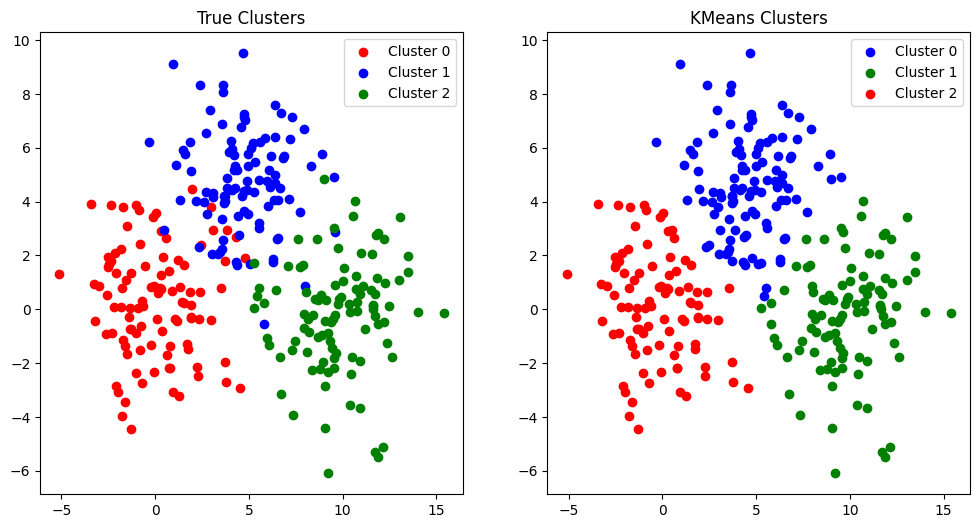

In [121]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plot the original data points with different colors for each cluster
axes[0].scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Cluster 0')
axes[0].scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Cluster 1')
axes[0].scatter(X[y == 2, 0], X[y == 2, 1], color='green', label='Cluster 2')
axes[0].set_title('True Clusters')
axes[0].legend()

# plot the KMeans classified data points with different colors for each cluster
axes[1].scatter(X[y_hat == 0, 0], X[y_hat == 0, 1], color='blue', label='Cluster 0')
axes[1].scatter(X[y_hat == 1, 0], X[y_hat == 1, 1], color='green', label='Cluster 1')
axes[1].scatter(X[y_hat == 2, 0], X[y_hat == 2, 1], color='red', label='Cluster 2')
axes[1].set_title('KMeans Clusters')
axes[1].legend()

# show the plots
plt.show()

### Exercise 2

Prove that the k-means sum of squares is a non-increasing function of the number of iterations. \
Deduce that the k-means algorithm converges.

### Counter example of non global minimum

The k-means algorithm is not guaranteed to find the global minimum. We will generate a dataset with 3 clusters using 2-dimensional Gaussian Mixtures and apply the k-means algorithm to this dataset. We will then visualize the results and show that the algorithm may converge to a local minimum.

### Exercise 3

Find the greatest size of dataset $n$ such that the number $S(n, 3)$ of partitions into 3 non empty clusters is realizable (e.g. inferior to $1000$).\
Generate a dataset using 2-dimensional Gaussian mixtures with $n$ data points.\
Find the global minimum of the k-means algorithm for this dataset by testing all possible partitions into 3 non empty clusters.\
Test 4 initializations of the k-means algorithm and compare the results.\
Deduce that the k-means algorithm may converge to different local minima.

# Perceptron Algorithm

The perceptron algorithm is a simple iterative method to find a hyperplane that separates two classes of data points. The algorithm works as follows:
- Initialize the weights and the bias.
- For each data point, update the weights and the bias if the data point is misclassified.
- Repeat the previous step until convergence.

The normalized estimated weights are: [0.89864197 0.43868281]
The real normalized weights are: [0.83205029 0.5547002 ]
The accuracy is: 1.0
The number of iterations over the data is: 2


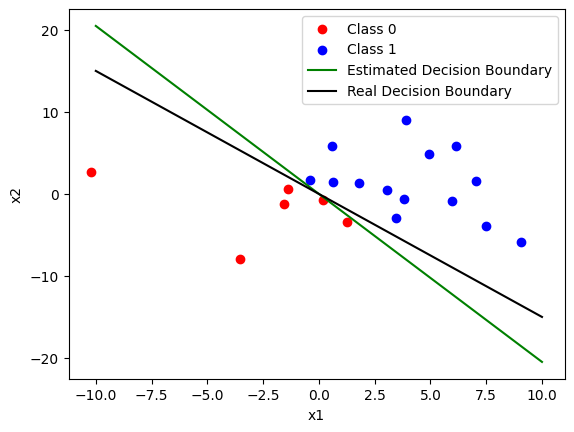

In [18]:
# the imports
import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# number of samples
n = 20

# number of input variables
p = 2

# input data assumed to be normally distributed
# we define the input data to have a mean of 0 and a standard deviation of 4
sigma = 4
X = sigma * np.random.randn(n, p)

# define beta
beta = np.array([2.1, 1.4])

# normalize the beta
beta = beta / np.linalg.norm(beta)

# generate the response variable
y = 1. * (X.dot(beta) > 0)


# iterate with the perceptron algorithm

# initialize the weights
beta_hat = np.zeros(p)

# initialize the class predictions
y_hat = 1. * (beta_hat.dot(X.T) > 0)

# initialize the number of iterations
K = 0

while np.any(y_hat != y) and K < 10:
    # iterate over the data
    for i in range(n):
        # predict the class
        y_hat[i] = 1. * (X[i, :].dot(beta_hat) > 0)

        # if the prediction is wrong
        if y_hat[i] != y[i]:
            # update the weights
            beta_hat += (y[i] - y_hat[i]) * X[i, :]
    K += 1

# print the normalized estimated weights
print(f"The normalized estimated weights are: {beta_hat / np.linalg.norm(beta_hat)}")

# print the real normalized weights
print(f"The real normalized weights are: {beta}")

# print the accuracy
print(f"The accuracy is: {np.mean(y == y_hat)}")

# print the number of iterations over the data
print(f"The number of iterations over the data is: {K}")


# plot down the data with different colors for each class
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.legend()

# plot the decision boundary
x = np.linspace(-10, 10, 100)
plt.plot(x, -beta_hat[0] / beta_hat[1] * x, color='green', label='Estimated Decision Boundary')

# plot the real decision boundary
plt.plot(x, -beta[0] / beta[1] * x, color='black', label='Real Decision Boundary')
plt.legend()


# show the plot
plt.show()

The normalized estimated weights are: [0.81491202 0.57958468]
The real normalized weights are: [0.83205029 0.5547002 ]
The accuracy is: 1.0
The number of iterations over the data is: 2


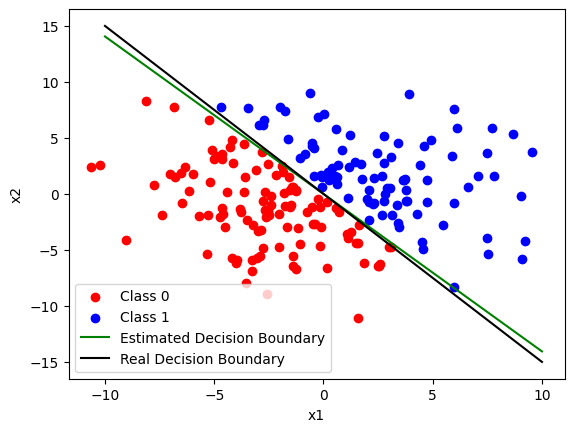

In [19]:
# the imports
import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# number of samples
n = 200

# number of input variables
p = 2

# input data assumed to be normally distributed
# we define the input data to have a mean of 0 and a standard deviation of 4
sigma = 4
X = sigma * np.random.randn(n, p)

# define beta
beta = np.array([2.1, 1.4])

# normalize the beta
beta = beta / np.linalg.norm(beta)

# generate the response variable
y = 1. * (X.dot(beta) > 0)


# iterate with the perceptron algorithm

# initialize the weights
beta_hat = np.zeros(p)

# initialize the class predictions
y_hat = 1. * (beta_hat.dot(X.T) > 0)

# initialize the number of iterations
K = 0

while np.any(y_hat != y) and K < 20:
    # iterate over the data
    for i in range(n):
        # predict the class
        y_hat[i] = 1. * (X[i, :].dot(beta_hat) > 0)

        # if the prediction is wrong
        if y_hat[i] != y[i]:
            # update the weights
            beta_hat += (y[i] - y_hat[i]) * X[i, :]
    K += 1

# print the normalized estimated weights
print(f"The normalized estimated weights are: {beta_hat / np.linalg.norm(beta_hat)}")

# print the real normalized weights
print(f"The real normalized weights are: {beta}")

# print the accuracy
print(f"The accuracy is: {np.mean(y == y_hat)}")

# print the number of iterations over the data
print(f"The number of iterations over the data is: {K}")


# plot down the data with different colors for each class
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.legend()

# plot the decision boundary
x = np.linspace(-10, 10, 100)
plt.plot(x, -beta_hat[0] / beta_hat[1] * x, color='green', label='Estimated Decision Boundary')

# plot the real decision boundary
plt.plot(x, -beta[0] / beta[1] * x, color='black', label='Real Decision Boundary')
plt.legend()


# show the plot
plt.show()

### XOR Problem

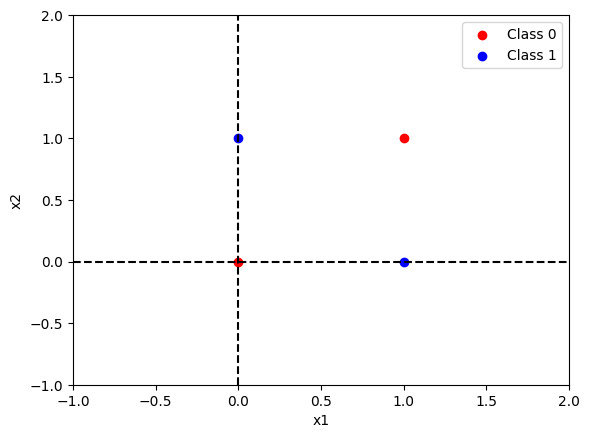

In [166]:
# the imports
import numpy as np
import matplotlib.pyplot as plt

# plot down the data with different colors for each class
data_points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
data_classes = np.array([0, 1, 1, 0])


# set x and y limits for the plot
plt.xlim(-1, 2)
plt.ylim(-1, 2)


# plot down the data with different colors for each class
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(data_points[data_classes == 0, 0], data_points[data_classes == 0, 1], color='red', label='Class 0')
plt.scatter(data_points[data_classes == 1, 0], data_points[data_classes == 1, 1], color='blue', label='Class 1')
plt.legend()


# plot x=0 and y=0 in black (dashed lines)
plt.axvline(0, color='black', linestyle='dashed')
plt.axhline(0, color='black', linestyle='dashed')

# show the plot
plt.show()

### Exercise 4

Show that the perceptron algorithm can not solve the XOR problem.